# Retail Data Analytics


One of the main challenges in retail industry is to identify the  kind of markdowns or promotions that needs to be provided during the ever important holiday season to the customer.  Most of the companies in retail industry tend to take a hit on the bottom line sales during holiday season to entice customers into the store. This problem has become even more true for brick and mortar stores due to advances in online shopping.


The dataset that I have chosen contains 45 stores and historic sales for each one of those stores spread across  several years with various other features.

The model developed would predict which departments will be affected and to what extent during the key holiday time frames so that executives and marketing department can make informed and data-driven decisions about markdown amounts to preserve margins.

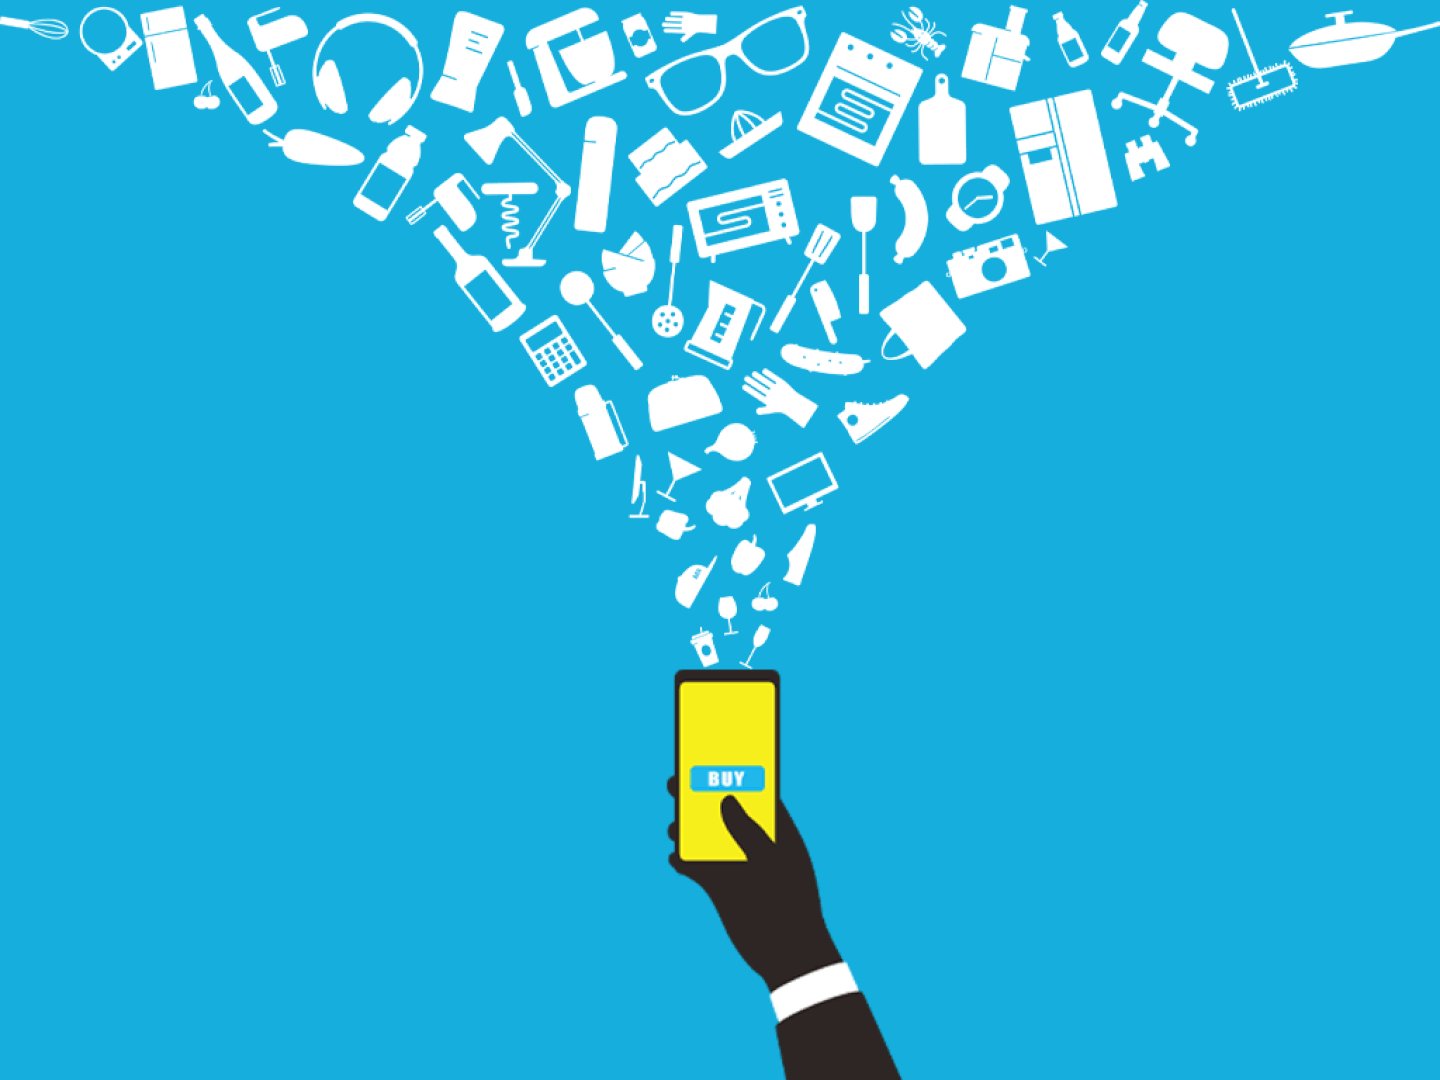

source: https://www.kaggle.com/manjeetsingh/retaildataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### Exploratory Data Analysis:


Performing Exploratory Data Analysis and undertsnading data well.


Steps:

1. Inspecting the shape, details of columns of the dataset.


2. Checking for duplicate values.


3. Checking for null values, replacing them with values, if applicable.


4. Dropping irrelavant columns.

In [2]:
stores_data =pd.read_csv(r'C:\Users\home\Downloads\stores.csv')
stores_data.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
print(len(stores_data))
stores_data.isna().sum()

45


Store    0
Type     0
Size     0
dtype: int64

In [4]:
stores_data.shape

(45, 3)

In [5]:
features_df = pd.read_csv(r'C:\Users\home\Downloads\features.csv')
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
features_df.Store.value_counts()

43    182
41    182
33    182
29    182
25    182
21    182
17    182
13    182
9     182
5     182
1     182
44    182
40    182
36    182
32    182
28    182
24    182
20    182
16    182
12    182
8     182
37    182
45    182
39    182
2     182
35    182
31    182
27    182
23    182
19    182
15    182
11    182
7     182
3     182
42    182
38    182
34    182
30    182
26    182
22    182
18    182
14    182
10    182
6     182
4     182
Name: Store, dtype: int64

In [7]:
print(features_df.MarkDown3.mean())
print(features_df.MarkDown3.median())


1760.1001799058915
36.26


In [8]:
print(len(features_df))
features_df.isna().sum()

8190


Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
features_df.shape

(8190, 12)

In [10]:
sales_df = pd.read_csv(r'C:\Users\home\Downloads\sales.csv')
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [11]:
len(sales_df.Store.value_counts().keys())

45

In [12]:
print(len(sales_df))
sales_df.isna().sum()

421570


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
sales_df.shape

(421570, 5)

In [14]:
#temp_df = pd.concat([sales_df,features_df],axis=1)
len(sales_df[sales_df.Store == 2][sales_df.Dept == 2])

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


143

## Observations:



1. Shape of the data; 
        Store: 45 rows, 3 columns
        Sales: 421570 rows, 5 columns
        Features: 8190 rows, 12 columns


2. The sales and features datasets have Store,Date and IsHoliday in common, of which store and Date are numerical and IsHoliday a categorical column.


3.  The column 'Store' acts as a key to merge all the datasets.



In [15]:
final = sales_df.merge(features_df, how='left', on =['Store','Date'])
final = final.merge(stores_data,how='left', on = ['Store'])
final.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [16]:
final.shape

(421570, 17)

In [17]:
final_report = sv.analyze(final)

:FEATURES DONE:                    |█████████████████████| [100%]   00:09  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:15  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
final_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [19]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [20]:
final.shape

(421570, 17)

In [21]:
# Get names of indexes for weekly sales <=0
indexNames = final[final['Weekly_Sales'] <= 0].index
# Delete these row indexes from dataFrame
final.drop(indexNames , inplace=True)

final.shape

(420212, 17)

#### Missing values analysis

In [22]:
final.drop_duplicates()
final.shape

(420212, 17)

In [23]:
final.drop(['IsHoliday_y'],axis=1,inplace=True)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [24]:
temp=[]
for a in final.keys():
    if not pd.api.types.is_numeric_dtype(final[a]):
        final[a]=final[a].astype('category').cat.as_ordered()
        temp.append(a)
print(temp)
len(temp)

['Date', 'Type']


2

#### Imputing missing values with median

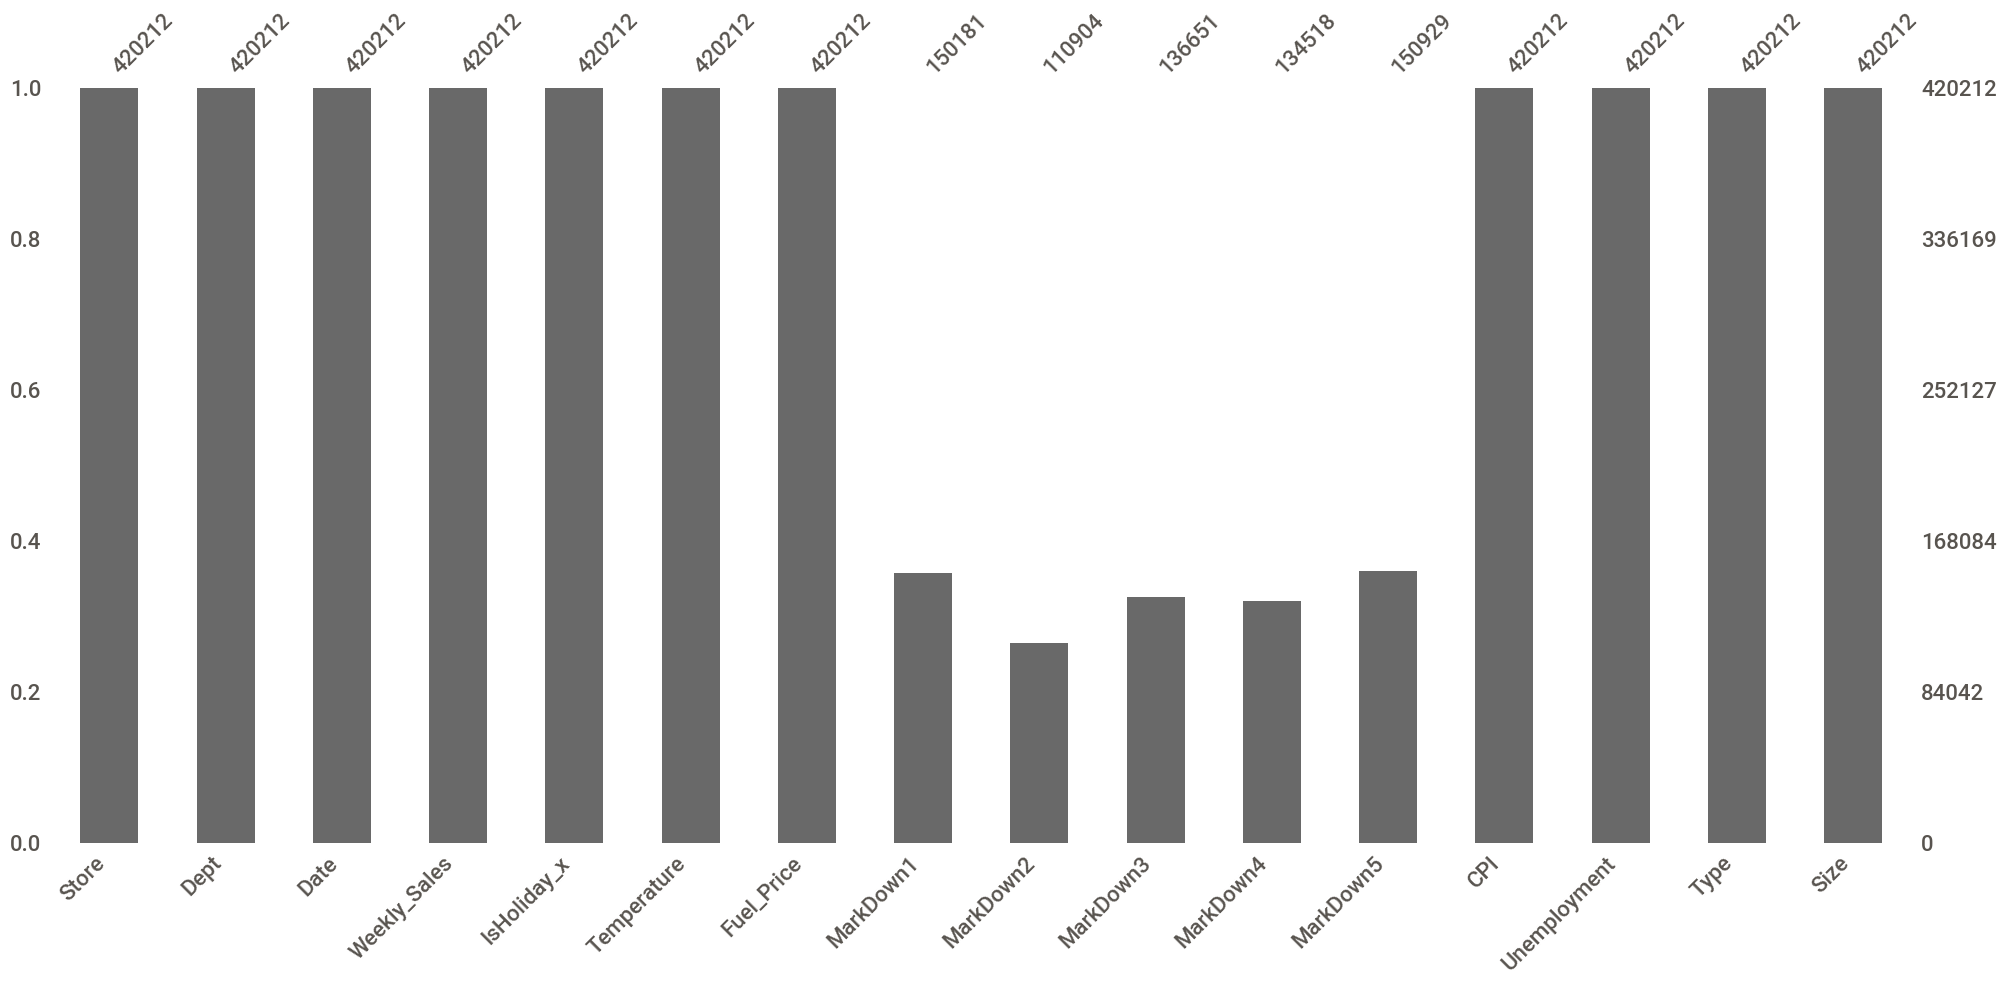

In [25]:
import missingno as msno
msno.bar(final);

In [26]:
for a in final.keys():
    if pd.api.types.is_numeric_dtype(final[a]):
        if final[a].isna().sum()>0:
            final[a].fillna(final[a].median(),inplace=True)
            print(a,final[a].isna().sum())

MarkDown1 0
MarkDown2 0
MarkDown3 0
MarkDown4 0
MarkDown5 0


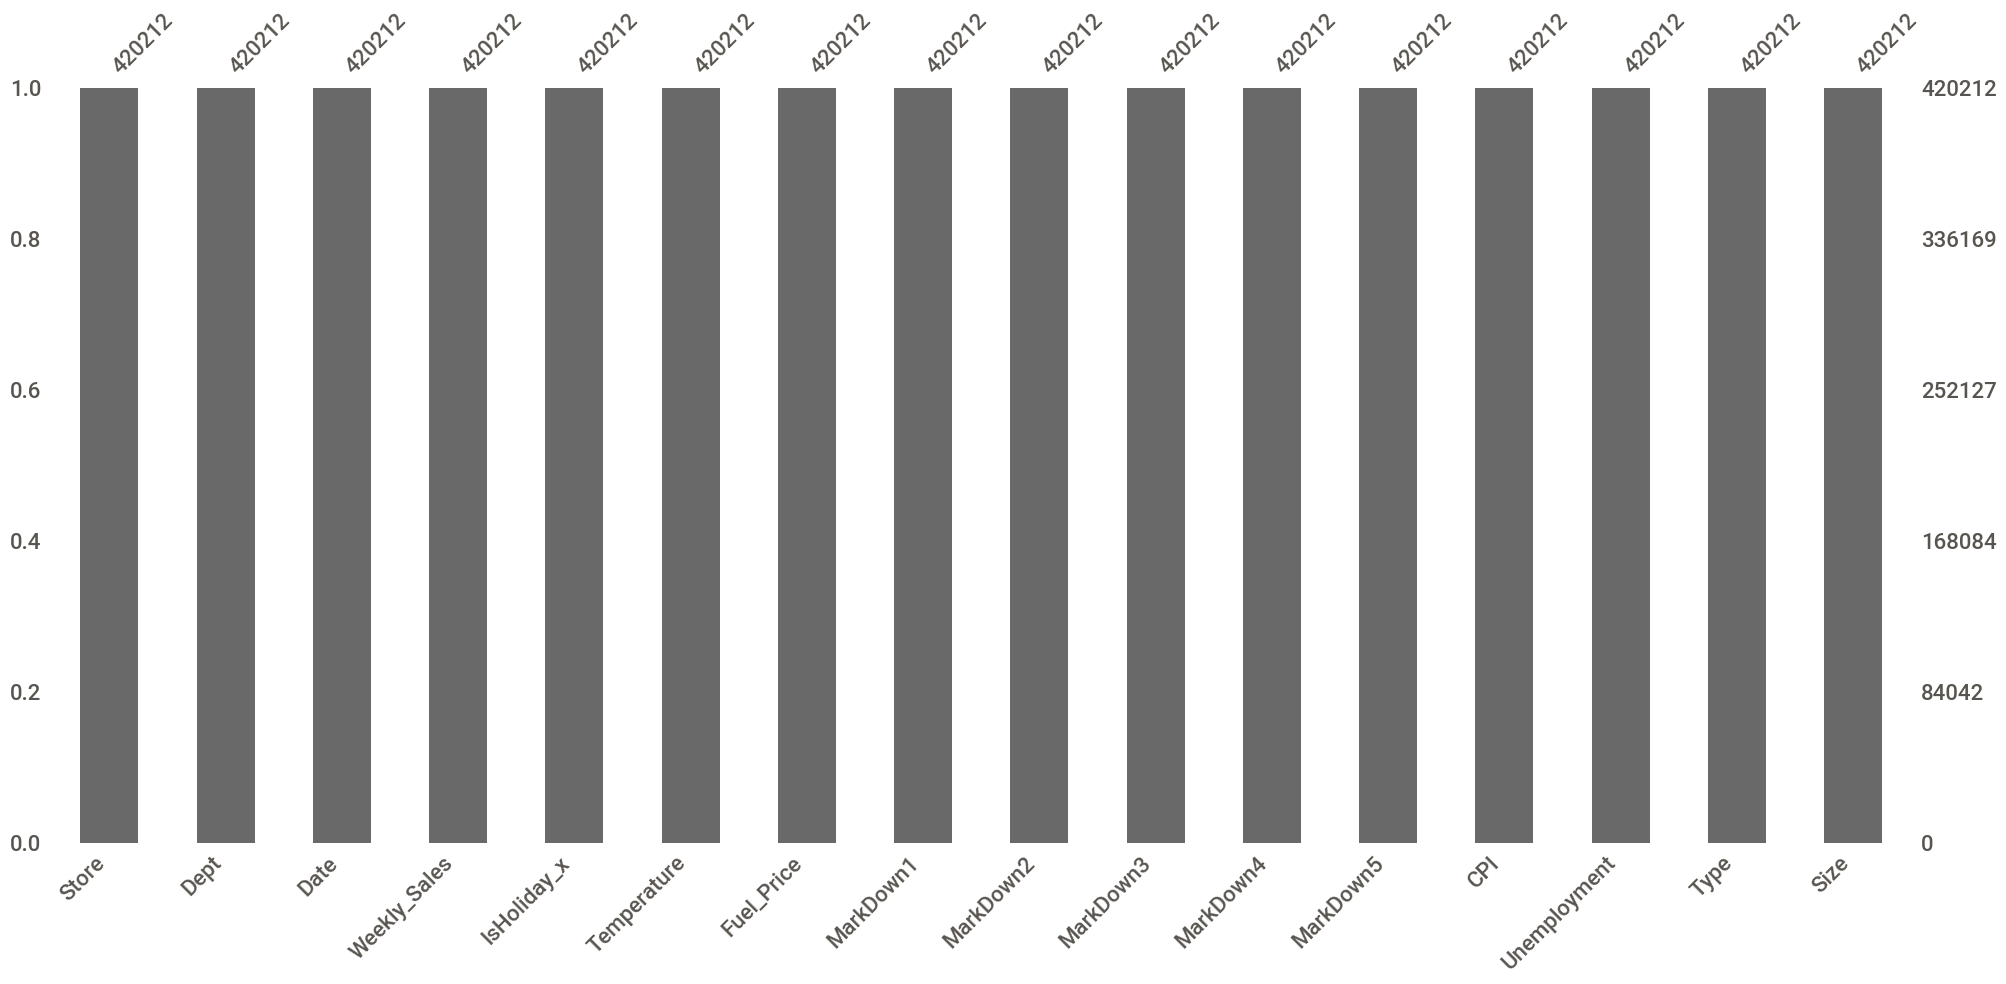

In [27]:
msno.bar(final);

In [28]:
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315


In [29]:
final.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

#### Outliers:

In [30]:
Q1 = final["CPI"].quantile(0.25)
Q3 = final["CPI"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [31]:
print("lower", lower)

lower 11.388436249999984


In [32]:
print("upper", upper)

upper 333.07971745000003


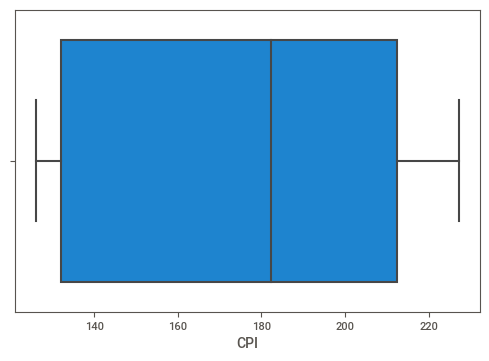

In [33]:
sns.boxplot(x=final["CPI"])

In [34]:
final[(final["CPI"] > upper)].shape

(0, 16)

In [35]:
final[(final["CPI"] < lower)].shape

(0, 16)

#### Taking 10% of data

In [36]:
final_10= final.sample(frac=0.1, random_state=1)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,42.31,2.572,5347.45,192.0,24.6,1481.31,3359.45,211.096358,8.106,A,151315
1,1,1,12/02/2010,46039.49,True,38.51,2.548,5347.45,192.0,24.6,1481.31,3359.45,211.242170,8.106,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,5347.45,192.0,24.6,1481.31,3359.45,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,5347.45,192.0,24.6,1481.31,3359.45,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,46.50,2.625,5347.45,192.0,24.6,1481.31,3359.45,211.350143,8.106,A,151315


In [37]:
final_10.shape

(42021, 16)

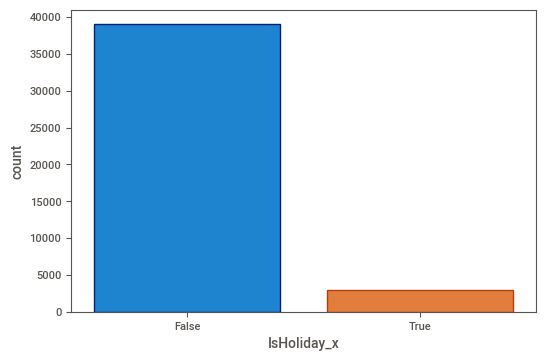

In [38]:
sns.countplot(x='IsHoliday_x', data=final_10,edgecolor=sns.color_palette("dark", 3))

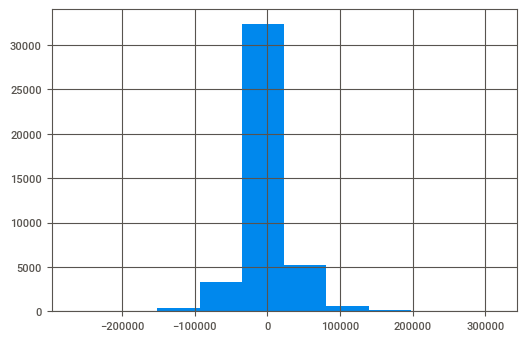

In [39]:
# Weekly Diff of sales distributed normally
plt.figure()
final_10['Weekly_Sales'].diff().hist()

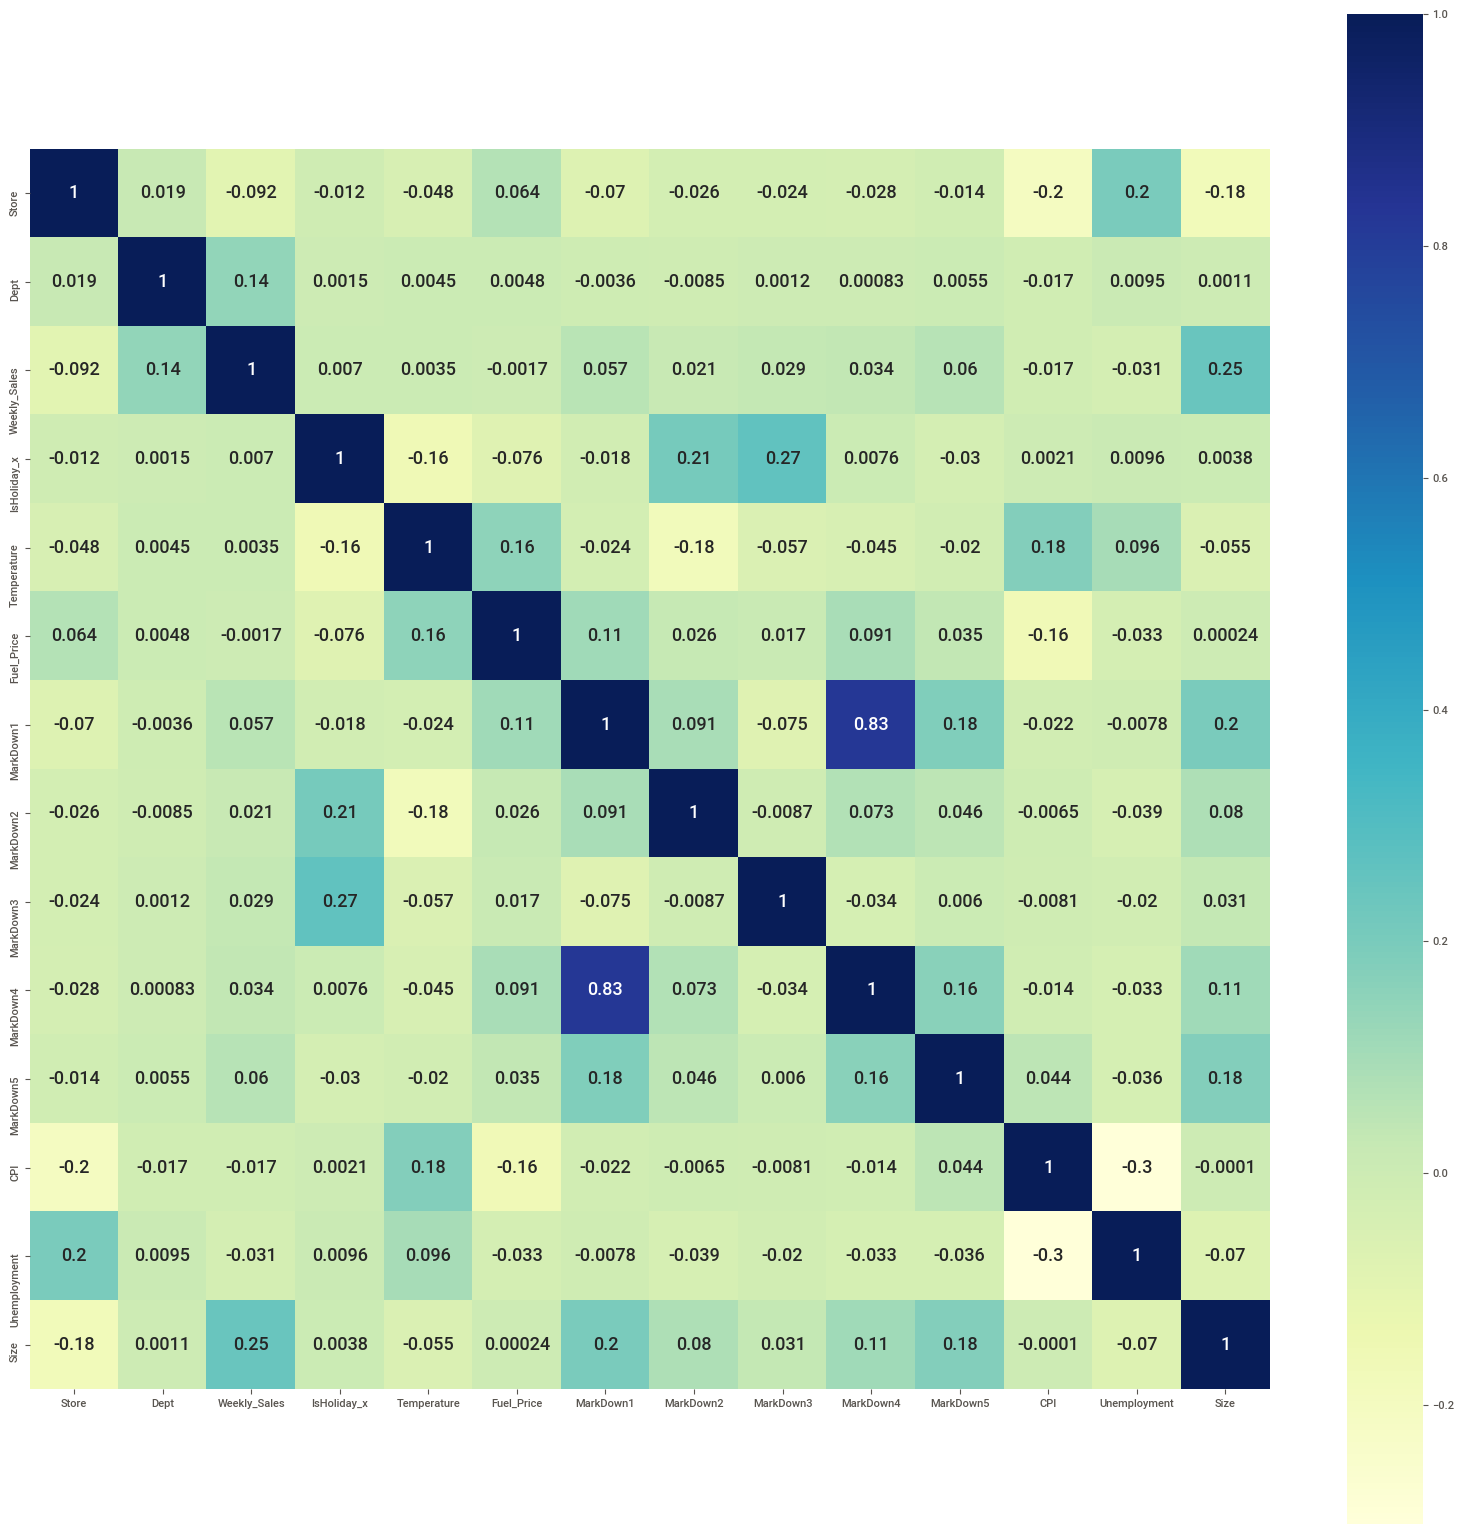

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(final_10.corr(),annot=True,annot_kws={'size':13},square=True,cmap="YlGnBu")

In [41]:
final_10['year1'] = pd.DatetimeIndex(final_10['Date']).year*100+pd.DatetimeIndex(final_10['Date']).month
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.14,5630.15,20.53,2457.88,9394.39,131.108000,11.627,A,206302,201204
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.57,70.94,1109.59,1307.67,17316.01,129.845967,10.148,A,158114,201102
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,5347.45,192.00,24.60,1481.31,3359.45,214.647445,6.442,B,125833,201007
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,5347.45,192.00,24.60,1481.31,3359.45,126.983581,7.127,A,205863,201012
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,5347.45,192.00,24.60,1481.31,3359.45,203.201097,9.521,C,41062,201012


In [42]:
final_10['year'] = pd.DatetimeIndex(final_10['Date']).year
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1,year
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.14,5630.15,20.53,2457.88,9394.39,131.108000,11.627,A,206302,201204,2012
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.57,70.94,1109.59,1307.67,17316.01,129.845967,10.148,A,158114,201102,2011
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,5347.45,192.00,24.60,1481.31,3359.45,214.647445,6.442,B,125833,201007,2010
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,5347.45,192.00,24.60,1481.31,3359.45,126.983581,7.127,A,205863,201012,2010
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,5347.45,192.00,24.60,1481.31,3359.45,203.201097,9.521,C,41062,201012,2010


In [43]:
final_10['month'] = pd.DatetimeIndex(final_10['Date']).month
final_10.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year1,year,month
274009,28,59,13/04/2012,185.73,False,64.28,4.254,8478.14,5630.15,20.53,2457.88,9394.39,131.108000,11.627,A,206302,201204,2012,4
330245,34,95,02/12/2011,62237.69,False,39.75,3.176,4611.57,70.94,1109.59,1307.67,17316.01,129.845967,10.148,A,158114,201102,2011,2
78823,9,2,16/07/2010,22415.59,False,82.93,2.623,5347.45,192.00,24.60,1481.31,3359.45,214.647445,6.442,B,125833,201007,2010,7
31137,4,12,24/12/2010,6069.23,False,43.21,2.887,5347.45,192.00,24.60,1481.31,3359.45,126.983581,7.127,A,205863,201012,2010,12
399930,43,16,12/02/2010,4099.41,True,47.99,2.548,5347.45,192.00,24.60,1481.31,3359.45,203.201097,9.521,C,41062,201012,2010,12


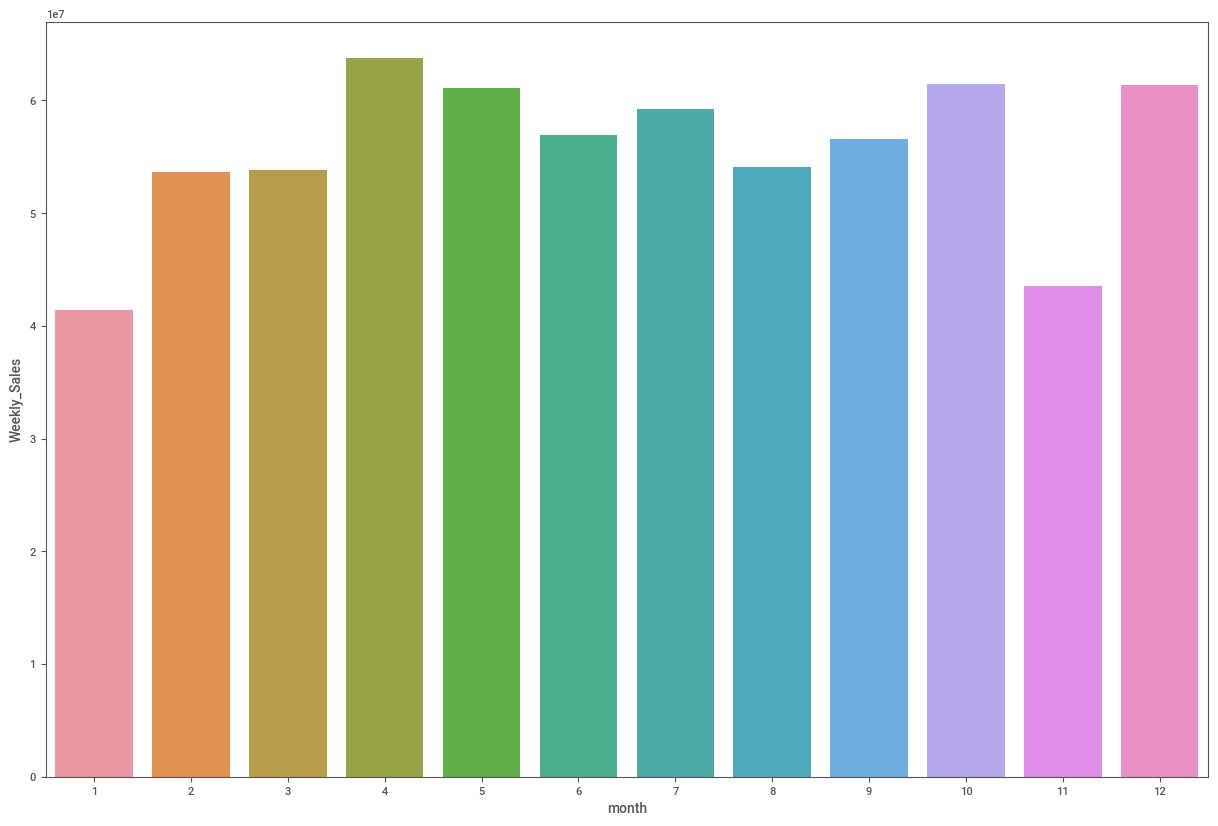

In [44]:
data_sales_month = final_10.groupby(final_10['month']).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(15, 10))
sns.barplot(x=data_sales_month.index,y=data_sales_month.Weekly_Sales)

Text(0, 0.5, 'Sales')

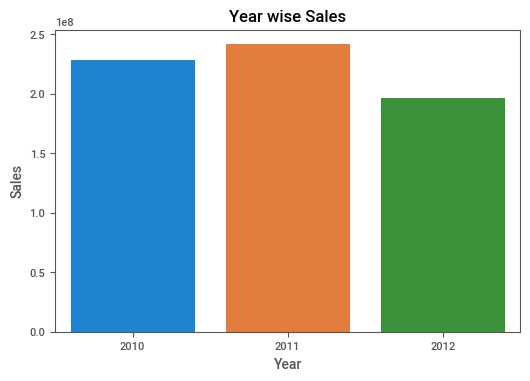

In [45]:
sales_year = final_10.groupby(final_10['year']).agg({"Weekly_Sales":"sum"})

sns.barplot(x=sales_year.index,y=sales_year.Weekly_Sales)
plt.title("Year wise Sales")
plt.xlabel("Year")
plt.ylabel("Sales")

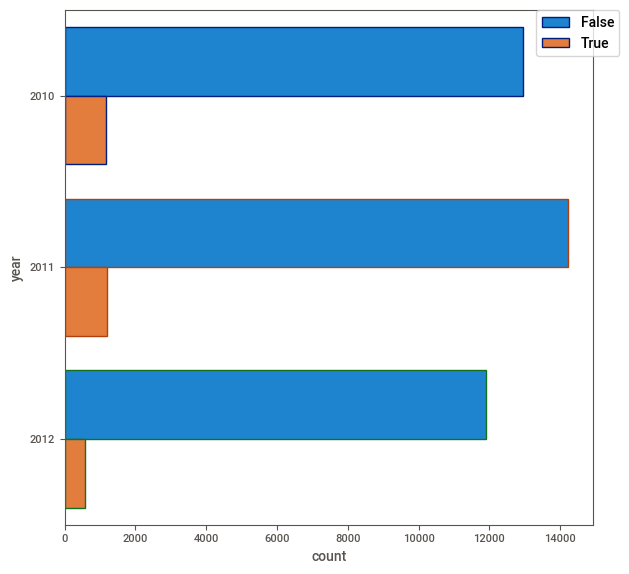

In [46]:
fig=plt.figure(figsize=(15,15))
sns.set_context( font_scale=1.8) 

ax1=fig.add_subplot(221)
ax1=sns.countplot(y='year',hue='IsHoliday_x', data=final_10,edgecolor=sns.color_palette("dark", 3))
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)




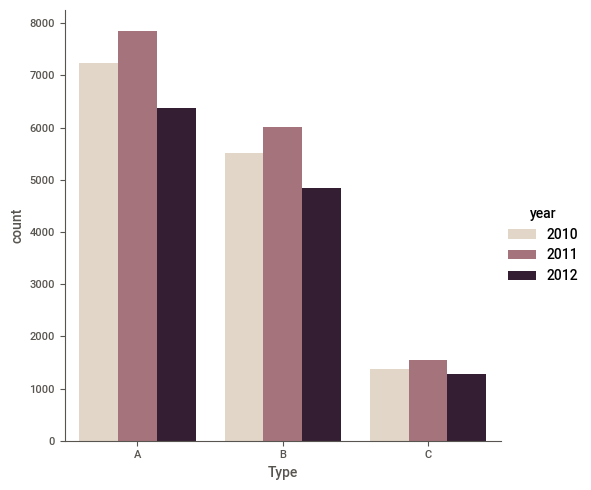

In [47]:
sns.catplot(x="Type", hue='year',kind="count", palette="ch:.25", data=final_10)

C:\Users\home\anaconda3\ANACONDA3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


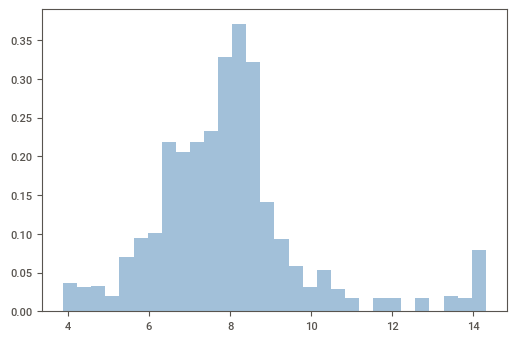

In [48]:
plt.hist(final_10['Unemployment'], bins=30, normed=True, alpha=0.5,histtype='stepfilled', color='steelblue', edgecolor='none');

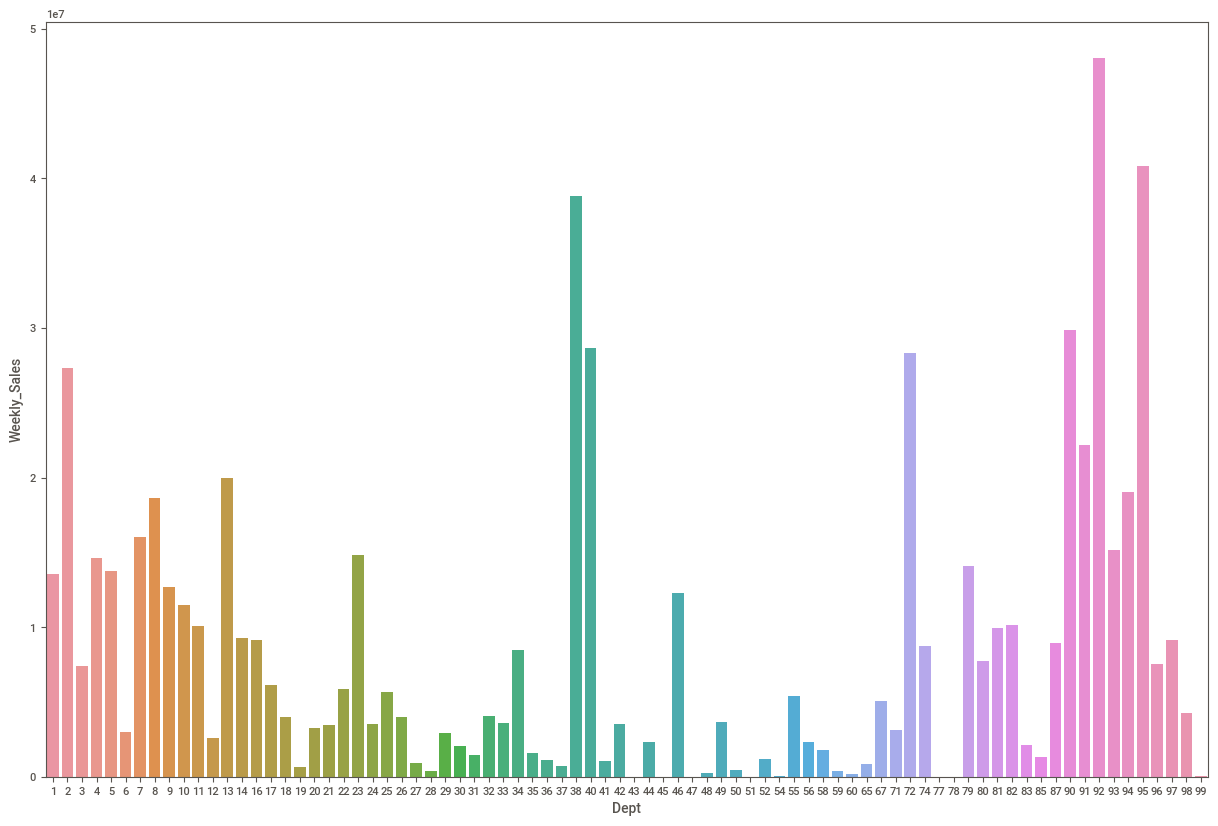

In [49]:
dept_sales = final_10.groupby(final_10['Dept']).agg({"Weekly_Sales":"sum"})
plt.figure(figsize=(15, 10))
sns.barplot(x=dept_sales.index,y=dept_sales.Weekly_Sales)

### Weekly_sales Prediction

In [50]:
to_Integer=final['IsHoliday_x']
gender_encoder = LabelEncoder()
to_Integer = gender_encoder.fit_transform(to_Integer)
to_Integer

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
X = final_10[['IsHoliday_x','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] 
Y = final_10['Weekly_Sales']


In [52]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)
print("sklearn results")
print("")
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

sklearn results

Intercept: 
 12851.457089954123
Coefficients: 
 [-1.83651824e+02  3.70870622e-01  6.90179689e-02  1.40997075e-01
 -2.58871311e-01  3.13818158e-01]


In [53]:
new_IsHoliday_x = 0
new_MarkDown1 = 10.4
new_MarkDown2 =30.2 
new_MarkDown3 = 19.5
new_MarkDown4 = 2.3
new_MarkDown5 = 1.9
print ('Predicted Weekly Sales: \n', regr.predict([[new_IsHoliday_x,new_MarkDown1,new_MarkDown2,new_MarkDown3,new_MarkDown4,new_MarkDown5]]))

Predicted Weekly Sales: 
 [12860.14878053]


### Modeling:

In [54]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import svm, preprocessing
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt
from matplotlib import style

style.use('ggplot')


#Dropping the 'Label' from  and assigning to X
X = np.array(final_10.drop(['Weekly_Sales', 'Date', 'Type','MarkDown1','MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5'], 1))
X = preprocessing.scale(X)


final.dropna(inplace=True)
Y = np.array(final_10['Weekly_Sales'])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=40)

list1 = [X_train, X_test, Y_train, Y_test]
for i in list1:
    print(i.shape)


clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)

print(accuracy)

(33616, 11)
(8405, 11)
(33616,)
(8405,)
0.08776565817763571
